# Notebook 1: Data Exploration

Weclome!, The main goal for this notebook is to provide a deep understanding of the dataset, its characteristics, and any hidden patterns.

---

## Introduction

#### Data Description

This porjects analyze radio continuum data from the MeerKAT International GHz Tiered Extragalactic Exploration([MIGHTEE](https://idia.ac.za/mightee/)) survey, focusing on extragalactic radio emissions in the COSMOS field. MIGHTEE offers insights into galaxy evolution, given its depth and multiwavelength coverage. The COSMOS field, devoid of bright radio, UV, and X-ray sources, is ideal for deep astronomical surveys.

The MIGHTEE-COSMOS data includes deep fields like E-CDFS, ELAIS-S1, and XMM-LSS, covering 20 deg^2 areas at a central frequency of 1284 MHz. These fields were observed using MeerKAT's L-band receivers for about 1000 hours. They were chosen due to their extensive multiwavelength data from prior and potential future surveys.

The **MIGHTEE-COSMOS multiwavelength catalogue** combines radio data with optical, near-to-far infrared, and X-ray measurements from various sources in the COSMOS field. The main radio catalogue was cross-referenced with optical and near-infrared data from other studies, resulting in a matched set of 5,224 radio sources. Additionally, 572 of these sources were detected in X-ray observations. This dataset also incorporated Mid-Infrared (MIR) data, referencing specific IRAC flux densities. The catalogue further integrated far-infrared data from the Herschel Extra-galactic Legacy Project, identifying thousands of radio sources across different instruments.

#### Why explore the data?

Data exploration serves as the foundational step in data analysis, aimed at understanding inherent structures, patterns, and potential anomalies within a dataset. It helps ascertain the quality of data, understand features' distributions, formulate hypotheses, guide preprocessing decisions, and select appropriate analytical tools and models. Efficient data exploration also aids in communicating initial insights to stakeholders. In this notebook, we will perform some of these critical tasks.

<div align="center">
  <img src="images/cweb.jpg" width="400" height="400">
    <p><center>Cosmic Web</center></p>
</div>

---

### First we import some libraries:

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from astropy.table import Table 
import astropy.io.fits as fits 


---

### Reading data

In [4]:
import pickle

# Loading data from pickle file
with open("data/mightee.pkl", "rb") as file:
    mightee_data = pickle.load(file)

print(mightee_data)  

         RADIORA  RADIODEC  TOTALFLUX  TOTALFLUXERR  PEAKFLUX  PEAKFLUXERR  \
3377  149.628631  2.320881   0.000043      0.000012  0.000047     0.000007   
2801  150.008176  2.215616   0.000028      0.000008  0.000031     0.000005   
2692  150.130723  2.020210   0.000030      0.000009  0.000029     0.000005   
1294  150.202172  2.376996   0.000064      0.000010  0.000046     0.000005   
2658  150.205665  1.782724   0.000130      0.000012  0.000123     0.000007   
...          ...       ...        ...           ...       ...          ...   
4144  150.345822  2.147473   0.000181      0.000008  0.000182     0.000005   
550   150.231009  2.072680   0.000033      0.000009  0.000032     0.000005   
3719  150.317176  2.451681   0.000125      0.000010  0.000127     0.000006   
4554  150.275642  1.793911   0.000038      0.000011  0.000036     0.000006   
1012  149.825241  2.192343   0.000042      0.000010  0.000036     0.000005   

       flux_CFHT-u   flux_CFHT-g   flux_CFHT-r  flux_CFHT-iy  .

In [6]:
mightee_data.shape

(2824, 144)

From what we can observe, we have 144 features (columns) and 2824 rows. The following are the feature names:

In [12]:
list(mightee_data.columns[:10]) # printing the first 10 columns
# For feature description please check the following file @@

['RADIORA',
 'RADIODEC',
 'TOTALFLUX',
 'TOTALFLUXERR',
 'PEAKFLUX',
 'PEAKFLUXERR',
 'flux_CFHT-u',
 'flux_CFHT-g',
 'flux_CFHT-r',
 'flux_CFHT-iy']

In [14]:
print(mightee_data.isna().any().any()) # checking if the dataframe has any missing values

False


The dataframe seems to be clean, because someone did, You guys are welcome :D

---

### Descriptive Statistics:

**Descriptive statistics** provide a concise overview of the central tendencies, spread, and shape of the data distribution. By observing the mean, median, mode, and standard deviation, we can quickly grasp the characteristics of our dataset and identify potential anomalies or patterns.

In [15]:
desc_stats = mightee_data.describe()

# Display the statistics
desc_stats

,RADIORA,RADIODEC,TOTALFLUX,TOTALFLUXERR,PEAKFLUX,PEAKFLUXERR,flux_CFHT-u,flux_CFHT-g,flux_CFHT-r,flux_CFHT-iy,...,SFR_IR_lo,SFR_IR_hi,ln_like,ln_like_lo,S14,L14,fSF,fAGN,qir,LIR_WHz
count,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2.824000e+03,2.824000e+03,2.824000e+03,2.824000e+03,2.824000e+03,...,2.824000e+03,2.824000e+03,2824.000000,2824.000000,2824.000000,2.824000e+03,2824.000000,2824.000000,2824.000000,2.824000e+03
mean,150.117111,2.213743,0.000234,0.000081,0.000143,5.505361e-06,-2.418909e+00,-2.418909e+00,-2.418909e+00,-2.418909e+00,...,6.661093e+04,2.386007e+07,-19.423711,-21.678803,0.000228,1.135299e+24,0.594015,0.418967,2.026658,8.181013e+28
std,0.249375,0.247945,0.002431,0.002409,0.000834,9.109051e-07,1.528737e+01,1.528737e+01,1.528737e+01,1.528737e+01,...,3.536265e+06,1.255602e+09,18.818401,18.857034,0.002373,1.007616e+25,0.273763,0.238835,0.750241,4.118232e+30
min,149.604801,1.692431,0.000001,0.000000,0.000009,0.000000e+00,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,...,0.000000e+00,0.000000e+00,-356.447000,-358.323500,0.000001,3.280119e+15,0.000014,0.000958,-2.621464,4.880741e+16
25%,149.918694,2.022450,0.000037,0.000009,0.000034,4.960000e-06,1.010690e-30,2.028484e-30,4.178087e-30,7.901124e-30,...,4.624275e+00,9.829775e+00,-21.028975,-23.310925,0.000037,5.561828e+22,0.442830,0.245560,1.874243,6.164946e+24
50%,150.114237,2.214303,0.000054,0.000010,0.000048,5.440000e-06,3.325369e-30,6.504912e-30,1.495620e-29,3.268231e-29,...,2.192355e+01,3.428025e+01,-14.003100,-16.313800,0.000053,1.742416e+23,0.661927,0.373047,2.252486,2.194657e+25
75%,150.317873,2.405101,0.000087,0.000011,0.000079,6.042500e-06,1.297500e-29,2.571983e-29,6.343251e-29,1.220041e-28,...,6.355942e+01,9.619680e+01,-10.072775,-12.273625,0.000085,5.036621e+23,0.808175,0.550338,2.438244,6.104389e+25
max,150.635050,2.720006,0.087684,0.115520,0.025939,8.080000e-06,7.376022e-27,1.100876e-26,1.303079e-26,1.211518e-26,...,1.879218e+08,6.672216e+10,-3.423700,-4.986900,0.085602,3.119662e+26,1.000000,0.999990,8.373340,2.185097e+32


### Data Normalization

From our descriptive statistics and visual data exploration, we notice discrepancies in the scale of our features. Different scales can skew our data visualization and mask meaningful patterns. By normalizing, we rescale features to the range `[0,1]`, ensuring uniformity for better data visualization and insights.



In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_mightee = scaler.fit_transform(mightee_data)
normalized_mightee = pd.DataFrame(normalized_mightee, columns=mightee_data.columns)

In [24]:
normalized_mightee.describe()

,RADIORA,RADIODEC,TOTALFLUX,TOTALFLUXERR,PEAKFLUX,PEAKFLUXERR,flux_CFHT-u,flux_CFHT-g,flux_CFHT-r,flux_CFHT-iy,...,SFR_IR_lo,SFR_IR_hi,ln_like,ln_like_lo,S14,L14,fSF,fAGN,qir,LIR_WHz
count,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,...,2.824000e+03,2.824000e+03,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2.824000e+03
mean,0.497268,0.507322,0.002647,0.000701,0.005158,0.681357,0.975567,0.975567,0.975567,0.975567,...,3.544608e-04,3.576033e-04,0.954677,0.952759,0.002653,0.003639,0.594009,0.418414,0.422756,3.744004e-04
std,0.242053,0.241292,0.027727,0.020851,0.032147,0.112736,0.154418,0.154418,0.154418,0.154418,...,1.881774e-02,1.881837e-02,0.053306,0.053368,0.027718,0.032299,0.273767,0.239067,0.068236,1.884691e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.304677,0.321163,0.000411,0.000076,0.000985,0.613861,1.000000,1.000000,1.000000,1.000000,...,2.460744e-08,1.473240e-10,0.950130,0.948140,0.000413,0.000178,0.442822,0.244839,0.408894,2.821360e-08
50%,0.494478,0.507867,0.000597,0.000087,0.001493,0.673267,1.000000,1.000000,1.000000,1.000000,...,1.166631e-07,5.137760e-10,0.970032,0.967943,0.000600,0.000559,0.661922,0.372450,0.443296,1.004375e-07
75%,0.692135,0.693545,0.000975,0.000099,0.002707,0.747834,1.000000,1.000000,1.000000,1.000000,...,3.382227e-07,1.441752e-09,0.981165,0.979377,0.000976,0.001614,0.808172,0.549912,0.460191,2.793646e-07
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


---

### Freature selection

Having 147 features can be overwhelming for visualization and clustering. To simplify our dataset and remove redundant or highly correlated features, we can utilize correlation analysis. By examining how features correlate with one another, we can identify and remove those that offer similar information, thus streamlining our dataset for more effective analysis.

In [26]:
correlation_matrix = mightee_data.corr()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

mightee_data.drop(columns=to_drop, inplace=True)

In [28]:
mightee_data.shape

(2824, 44)

---

### Data Visualisation

Well, I will let you explore the all 46 features, but I am goint to explore only 3:

- qir
- Mstar
- COS_best_z_v5

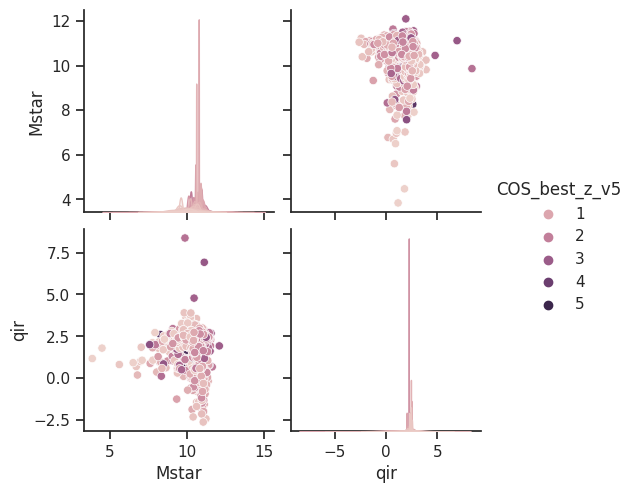

In [31]:
import seaborn as sns

# Settings for better visualization
sns.set(font_scale=1)
sns.set_style('ticks')

# Using pairplot with hue as 'class_star'
sns.pairplot(mightee_data[['Mstar', 'qir', 'COS_best_z_v5']], hue='COS_best_z_v5')
plt.show()

@@@ help here

----

### Saving the data

Now, we will be using the above three features to perform some clustering in the next notebook

In [33]:
import pickle

with open("mightee3Feat.pkl", "wb") as file:
    pickle.dump(mightee_data[['Mstar', 'qir', 'COS_best_z_v5']], file)